# Stack Overflow: Tag Prediction

## Introduction

Stack Overflow is the largest, most trusted online community for developers to learn, share their programming knowledge, and build their careers.<br />
<br />
Stack Overflow is something which every programmer use one way or another. Each month, over 50 million developers come to Stack Overflow to learn, share their knowledge, and build their careers. It features questions and answers on a wide range of topics in computer programming. The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down and edit questions and answers in a fashion similar to a wiki or Digg. As of April 2014 Stack Overflow has over 4,000,000 registered users, and it exceeded 10,000,000 questions in late August 2015. Based on the type of tags assigned to questions, the top eight most discussed topics on the site are: Java, JavaScript, C#, PHP, Android, jQuery, Python and HTML.<br />
<br />
### Dataset Statistics
All of the data is in 2 files: Train and Test.<br />
<pre>
<b>Train.csv</b> contains 4 columns: Id,Title,Body,Tags.<br />
<b>Test.csv</b> contains the same columns but without the Tags, which you are to predict.<br />
<b>Size of Train.csv</b> - 6.75GB<br />
<b>Size of Test.csv</b> - 2GB<br />
<b>Number of rows in Train.csv</b> = 6034195<br />
</pre>
The questions are randomized and contains a mix of verbose text sites as well as sites related to math and programming. The number of questions from each site may vary, and no filtering has been performed on the questions (such as closed questions).<br />
<br />

### Data Field Explaination
Dataset contains 6034195 rows. The column in the table are:<br />
<pre>
<b>Id</b> - Unique identifier for each question<br />
<b>Title</b> - The question's title<br />
<b>Body</b> - The body of the question<br />
<b>Tags</b> - The tags associated with the question (all lowercase, should not contain tabs '\t' or ampersands '&')<br />
</pre>
<br />

![title](img/SO.png)

## Objective
Analysing the data and plot the required graphs to show that these conclusions are True:<br />
<pre>
a. Presence of Redundant information.
b. Questions Consists of text and code.
c. More than 200 tags were used in at least 10,000 questions.
d. Total of more than 33M unique words are present in the data.
e. Majority of the most frequent tags were programming language.
f. More than 50% of questions contain &lt;code&gt; tag.
</pre>
We are also interested to find:<br />
<pre>
a. Total number of questions?
b. Average question size?
c. Minimum and maximum number of tags per question?
d. Average number of tags per question?
e. Unique Tags
f. Top 20 tags?
</pre>

## Loading the Data

In [1]:
#Let's import pandas to load the csv file.
import pandas as pd
#Since the file is too large, we will break it into chunks.
df = pd.read_csv("Train.csv", chunksize=500000)

In [2]:
#Observe that 'df' is a 'TextFileReader' object.
df

In [3]:
#In order to get the data frame, we have to iterate through 'df' chunk by chunk
df.get_chunk(5)

,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents


We won't be using above method to load the data. Using SQLite seems more appropriate.

## Using Pandas with SQLite to Load the data

In [6]:
#Creating db file from csv
'''
from sqlalchemy import create_engine # database connection
import datetime as dt
disk_engine = create_engine('sqlite:///train.db')
start = dt.datetime.now()
chunksize = 180000
j = 0
index_start = 1

for df in pd.read_csv('train.csv', names=['Id', 'Title', 'Body', 'Tags'], \
                      chunksize=chunksize, iterator=True, encoding='utf-8', ):

    df.index += index_start

    j+=1
    print '{} rows'.format(j*chunksize)

    df.to_sql('data', disk_engine, if_exists='append')
    index_start = df.index[-1] + 1
'''

"\nfrom sqlalchemy import create_engine # database connection\nimport datetime as dt\ndisk_engine = create_engine('sqlite:///train.db')\nstart = dt.datetime.now()\nchunksize = 180000\nj = 0\nindex_start = 1\n\nfor df in pd.read_csv('train.csv', names=['Id', 'Title', 'Body', 'Tags'],                       chunksize=chunksize, iterator=True, encoding='utf-8', ):\n\n    df.index += index_start\n\n    j+=1\n    print '{} rows'.format(j*chunksize)\n\n    df.to_sql('data', disk_engine, if_exists='append')\n    index_start = df.index[-1] + 1\n"

In [7]:
#This method seems more appropriate to work with this much data.
#importing sqlite3
import sqlite3
#creating the connection with database file.
con = sqlite3.connect('train.db')
data = pd.read_sql_query("""SELECT Tags FROM data""", con)
#Always remember to close the database
con.close()

In [8]:
#Printing first 5 columns from our data frame
data.head()

,Tags
0,Tags
1,php image-processing file-upload upload mime-t...
2,firefox
3,r matlab machine-learning
4,c# url encoding


In [9]:
#Observing the shape of our data frame.
data.shape
# Note: We have 6034195 data points.

(6034196, 1)

In [10]:
# Let's now drop unwanted column.
data.drop(data.index[0], inplace=True)
#Printing first 5 columns from our data frame
data.head()

,Tags
1,php image-processing file-upload upload mime-t...
2,firefox
3,r matlab machine-learning
4,c# url encoding
5,php api file-get-contents


In [11]:
#Observing the lables of each column.
data.keys()

Index([u'Tags'], dtype='object')

In [12]:
#Lets check for missing values.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6034195 entries, 1 to 6034195
Data columns (total 1 columns):
Tags    object
dtypes: object(1)
memory usage: 92.1+ MB


In [13]:
# Notice that this is not the correct observation.
# But it can be clearly seen that unique no of tags /
#would be much lesser than total datapoints.
data.describe()

,Tags
count,6034195
unique,2110907
top,android
freq,49783


<b>Observation:</b><br />
1. We have 6034195 datapoints.<br />
2. Moreover there are no missing values in 'Tags' column.<br />
3. Unique tags are much smaller compared to total datapoints.

## Tags

### Total number of unique tags

In [15]:
# Importing & Initializing the "CountVectorizer" object, which 
#is scikit-learn's bag of words tool.
from sklearn.feature_extraction.text import CountVectorizer
#by default 'split()' will tokenize each tag using space.
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
tag_dtm = vectorizer.fit_transform(data['Tags'])

In [16]:
#'get_feature_name()' gives us the vocabulary.
tags = vectorizer.get_feature_names()
#Printing unique tags.
print "Number of unique tags = %d"%len(tags)
#Lets look at the tags we have.
print tags[:10]

Number of unique tags = 42048
[u'.a', u'.app', u'.asp.net-mvc', u'.aspxauth', u'.bash-profile', u'.class-file', u'.cs-file', u'.doc', u'.drv', u'.ds-store']


<b>Observation:</b><br />
We have 42084 unique tags.

### Tag Count

In [17]:
#Lets now store the document term matrix in a dictionary.
terms = vectorizer.get_feature_names()
freqs = tag_dtm.sum(axis=0).A1
result = dict(zip(terms, freqs))

In [18]:
#Saving this dictionary to csv files.
import csv
with open('tag_counts_dict_dtm.csv', 'wb') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in result.items():
        writer.writerow([key, value])

In [19]:
#Reading the tag_counts_dict_dtm.csv to pandas df
tag_df = pd.read_csv("tag_counts_dict_dtm.csv", names=['Tags', 'Counts'])
tag_df.head()

,Tags,Counts
0,mdbg,26
1,fouc,35
2,mdraid,6
3,screen-resolution,661
4,mms-streaming,18


In [26]:
tag_df[tag_df.Counts>10000].head()
#More than 200 tags were used in at least 10,000 questions

,Tags,Counts
12776,c#,463526
30473,java,412189
12831,php,392451
22541,javascript,365623
23327,android,320622


In [27]:
# Store tags greater than 10K in one list
lst_tags_gt_10k = tag_df[tag_df.Counts>10000].Tags
#Print the length of the list
print '{} Tags are used more than 10000 times'.format(len(lst_tags_gt_10k))
# Store tags greater than 100K in one list
lst_tags_gt_100k = tag_df[tag_df.Counts>100000].Tags
#Print the length of the list.
print '{} Tags are used more than 100000 times'.format(len(lst_tags_gt_100k))

234 Tags are used more than 10000 times
19 Tags are used more than 100000 times


<b>Observations:</b><br />
1. There are total 234 tags which are used more than 10000 times.
2. 19 tags are used more than 100000 times.
3. Most frequent tag (i.e. c#) is used 463526 times.

### Tags Per Question

In [20]:
#Storing the count of unique tag in list 'tag_count'
tag_count = tag_dtm.sum(axis=0).tolist()[0]
#Converting each value in the 'tag_count' to integer.
tag_count = [int(j) for j in tag_count]
print 'We have {} unique tags'.format(len(tag_count))
#Storing the count of tag in each question in list 'tag_count'
tag_quest_count = tag_dtm.sum(axis=1).tolist()
#Converting each value in the 'tag_quest_count' to integer.
tag_quest_count=[int(j) for i in tag_quest_count for j in i]
print 'We have total {} datapoints.'.format(len(tag_quest_count))

print(tag_quest_count[:5])

We have 42048 unique tags
We have total 6034195 datapoints.
[5, 1, 3, 3, 3]


In [21]:
print "Maximum number of tags per question: %d"%max(tag_quest_count)
print "Minimum number of tags per question: %d"%min(tag_quest_count)
print "Avg. number of tags per question: %f"% ((sum(tag_quest_count)*1.0)/len(tag_quest_count))

Maximum number of tags per question: 5
Minimum number of tags per question: 1
Avg. number of tags per question: 2.885222


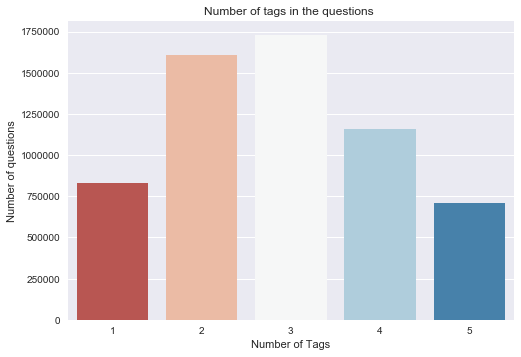

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.countplot(tag_quest_count, palette='RdBu')
plt.title("Number of tags in the questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

<b>Observations:</b><br />
1. Maximum number of tags per question: 5
2. Minimum number of tags per question: 1
3. Avg. number of tags per question: 2.885222
4. Most of the questions are having 2 or 3 tags

### Most Frequent Tags

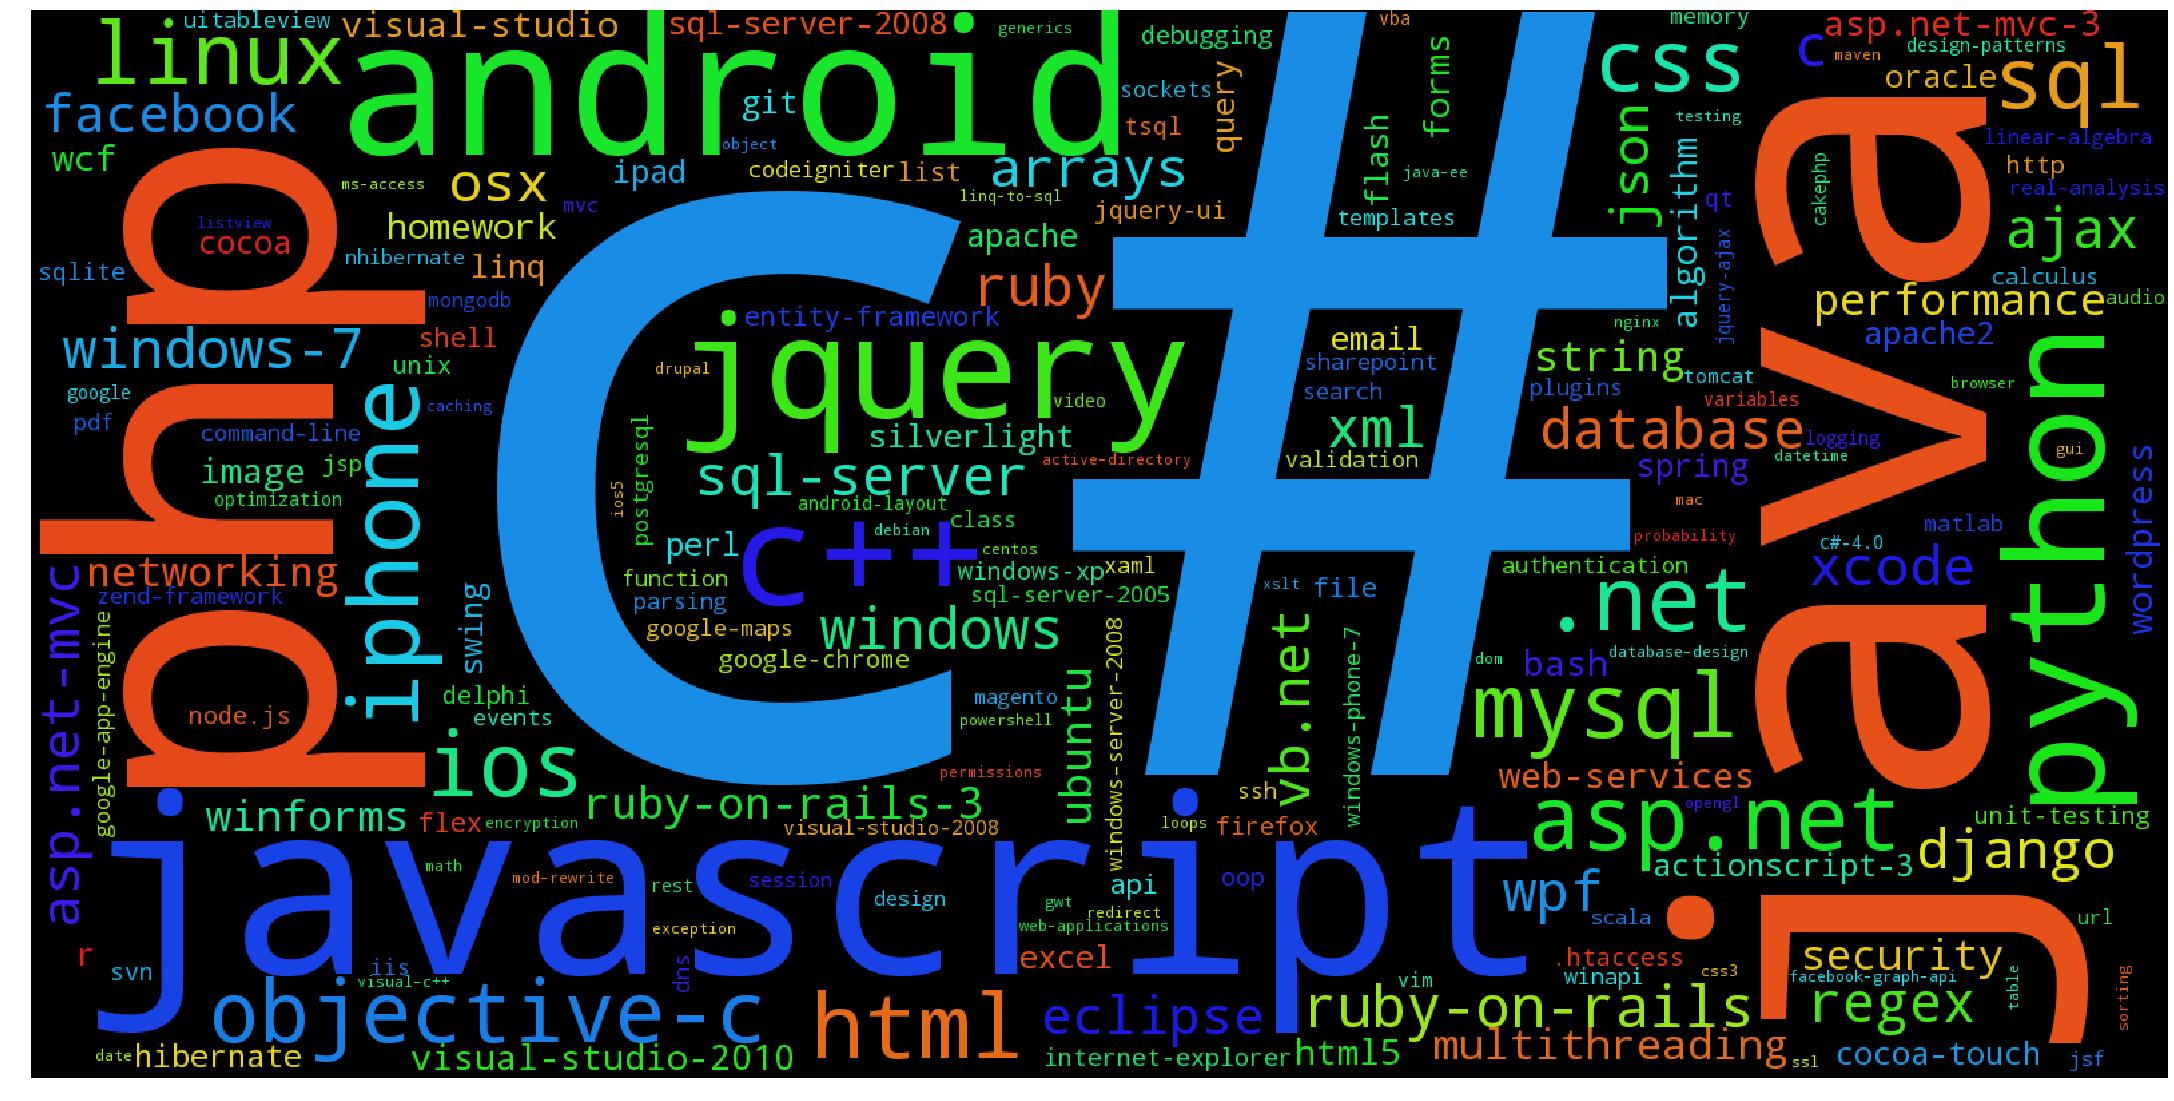

In [23]:
# Ploting word cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Lets first convert the 'result' dictionary to 'list of tuples'
tup = result.items()
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(tup)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()

<b>Observations:</b><br />
A look at the word cloud shows that "c#", "java", "php", "asp.net", "javascript", "c++" are some of the most frequent tags.

### A look at the top 20 tags

In [24]:
#Sorting the tags based on counts.
tag_df.sort_values(['Counts'], ascending=False, inplace=True)
tag_df.head(20) 
#o/p: 20 most frequent tags

,Tags,Counts
12776,c#,463526
30473,java,412189
12831,php,392451
22541,javascript,365623
23327,android,320622
4153,jquery,305614
3573,c++,199280
12552,python,184928
29481,iphone,183573
2216,asp.net,177334


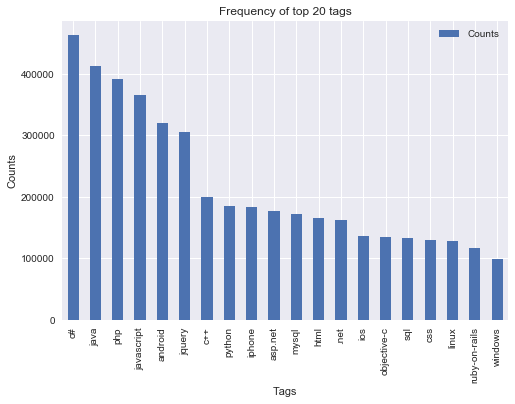

In [25]:
i=np.arange(20)
tag_df.head(20).plot(kind='bar')
plt.title('Frequency of top 20 tags')
plt.xticks(i, tag_df['Tags'])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

<b>Observations:</b><br />
1. Majority of the most frequent tags are programming language.
2. C# is the top most frequent programming language.
3. Android, IOS, Linux and windows are among the top most frequent operating systems.

## Checking for Duplicates

In [32]:
con = sqlite3.connect('train.db')
df = pd.read_sql_query('SELECT Title, Body, Tags, COUNT(*) as cnt_dup FROM data GROUP BY Title, Body, Tags Having COUNT(*)>1', con)
con.close()

In [33]:
df.head()

,Title,Body,Tags,cnt_dup
0,java.sql.SQLException:[Microsoft][ODBC Dri...,<p>I use the following code</p>\n\n<pre><code>...,java jdbc,2
1,btnAdd click event opens two window after r...,<p>i m opening window(search.aspx)using below ...,javascript asp.net web,3
2,Countable subadditivity of the Lebesgue measure,<p>Let $\lbrace F_n \rbrace$ be a sequence of ...,real-analysis measure-theory,3
3,HQL equivalent to this Sql Query,"<pre><code>select part.PaId,part.PaName,part.P...",hibernate hql,2
4,"""Uncaught TypeError: Property 'addListGroup' ...",<p>Asked this the other day but didn't get a r...,javascript listbox,2


In [34]:
df.tail()

,Title,Body,Tags,cnt_dup
1550026,♥ character displayed incorrectly in Glyphs,<p>I am using the Glyphs class to display text...,c# silverlight windows-phone-7,2
1550027,"打包时怎么忽略掉不需要打包的文件,tar命令","<p>打包时怎么忽略掉不需要打包的文件,如果用tar命令怎么打包?</p>\n\n<p><s...",linux,2
1550028,（wordpress）Plugin Error:You do not have suffic...,<p>My plugin which adds a menu in admin page h...,wordpress wordpress-plugin,2
1550029,� in base64 encoded emails,<p>I have a problem with Swedish language + MS...,php email outlook mime,2
1550030,� odd character,<p>� Odd Character when request file via ajax ...,html,2


In [35]:
df.shape

(1550031, 4)

In [36]:
df.cnt_dup.value_counts()

2    1272336
3     277575
4         90
5         25
6          5
Name: cnt_dup, dtype: int64

In [37]:
df["tag_count"] = df["Tags"].apply(lambda text: len(text.split(" ")))

In [41]:
df.tag_count.value_counts()

3    443599
2    419311
4    291553
1    219854
5    175714
Name: tag_count, dtype: int64

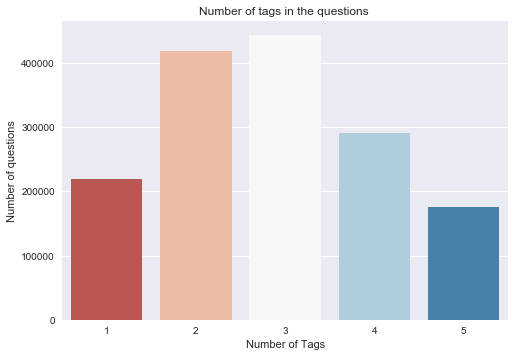

In [45]:
sns.countplot(x='tag_count', data=df, palette='RdBu')
plt.title("Number of tags in the questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

<b>Observations:</b><br />
1. More than 1.5M rows are exact duplicates and hence removing them will significantly reduce the size of the data.
2. The data contains many special unusual characters including Chinese characters.

## Removing Duplicates

In [153]:
#Creating a new database with no duplicates
'''
disk_dup = create_engine("sqlite:///train_no_dup.db")
question_tag = []
no_dup = pd.DataFrame(question_tag, columns=['Title', 'Body', 'Tags'])
no_dup.to_sql('no_dup_train',disk_dup, if_exists="append")
'''

'\ndisk_dup = create_engine("sqlite:///train_no_dup.db")\nquestion_tag = []\nno_dup = pd.DataFrame(question_tag, columns=[\'Title\', \'Body\', \'Tags\'])\nno_dup.to_sql(\'no_dup_train\',disk_dup, if_exists="append")\n'

## Analysis after removing duplicates

### Tags

In [1]:
import sqlite3
import pandas as pd
#creating the connection with database file.
con = sqlite3.connect('train_no_dup.db')
no_dup_df = pd.read_sql_query("""SELECT Tags FROM no_dup_train""", con)
#Always remember to close the database
con.close()

In [2]:
#Observing the shape of our data frame.
no_dup_df.shape
# Note: We now have 4206315 data points.

(4206315, 1)

In [3]:
# Let's now drop unwanted column.
no_dup_df.drop(no_dup_df.index[0], inplace=True)
#Printing first 5 columns from our data frame
no_dup_df.head()

,Tags
1,php image-processing file-upload upload mime-t...
2,firefox
3,r matlab machine-learning
4,c# url encoding
5,php api file-get-contents


In [4]:
# Importing & Initializing the "CountVectorizer" object
from sklearn.feature_extraction.text import CountVectorizer
#by default 'split()' will tokenize each tag using space.
no_dup_vect = CountVectorizer(tokenizer = lambda x: x.split())
no_dup_tag_dtm = no_dup_vect.fit_transform(no_dup_df['Tags'])

In [5]:
#'get_feature_name()' gives us the vocabulary.
no_dup_tags = no_dup_vect.get_feature_names()
#Printing unique tags.
print "Number of unique tags = %d"%len(no_dup_tags)
#Lets look at the tags we have.
print no_dup_tags[:10]

Number of unique tags = 42048
[u'.a', u'.app', u'.asp.net-mvc', u'.aspxauth', u'.bash-profile', u'.class-file', u'.cs-file', u'.doc', u'.drv', u'.ds-store']


In [67]:
#Storing the count of unique tag in list 'tag_count'
no_dup_tag_count = no_dup_tag_dtm.sum(axis=0).tolist()[0]
#Converting each value in the 'no_dup_tag_count' to integer.
no_dup_tag_count = [int(j) for j in no_dup_tag_count]
#Storing the count of tag in each question in list 'tag_count'
no_dup_tag_quest_count = no_dup_tag_dtm.sum(axis=1).tolist()
#Converting each value in the 'no_dup_tag_quest_count' to integer.
no_dup_tag_quest_count=[int(j) for i in no_dup_tag_quest_count for j in i]

print(no_dup_tag_quest_count[:5])

[5, 1, 3, 3, 3]


In [68]:
print "Maximum number of tags per question: %d"%max(no_dup_tag_quest_count)
print "Minimum number of tags per question: %d"%min(no_dup_tag_quest_count)
print "Avg. number of tags per question: %f"% ((sum(no_dup_tag_quest_count)*1.0)/len(no_dup_tag_quest_count))

Maximum number of tags per question: 5
Minimum number of tags per question: 1
Avg. number of tags per question: 2.899440


<b>Observations:</b><br />
1. Removing the duplicates won't change the number of unique tags.
2. Average number of tags per question will change a little bit.

### Questions

#### Preprocessing

In [23]:
# Remove table if exists
# import sqlite3
# con = sqlite3.connect('train_no_dup.db')
# cur=con.cursor()
# cur.execute("DROP TABLE QuestionsProcessed")
# con.commit()
# con.close()

In [24]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
#function to remove html tags from our document.
def striphtml(data):
    p = re.compile(r'<.*?>')
    return p.sub('', data)

con = sqlite3.connect('train_no_dup.db')

reader = con.cursor()
writer = con.cursor()
reader.execute("SELECT Title, Body, Tags From no_dup_train")
writer.execute("create table QuestionsProcessed(question text, code text, Tags text, words_pre int, words_post int, iscode int)")
reader.fetchone()
no_dup_code=0
len_pre=0L
len_post=0L
for row in reader:
    is_code = 0
    title=row[0]
    question=row[1]
    tags=row[2]
    x=len(question)+len(title)
    if '<code>' in question:
        no_dup_code+=1
        is_code = 1
    len_pre+=x
    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))
    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=question.encode('utf-8')
    title=title.encode('utf-8')
    question=striphtml(question)
    #Removing all non-alphabet characters from question
    question=title+" "+question
    question=re.sub(r'[^A-Za-z]+',' ',question)
    question=str(question.lower())
    words=word_tokenize(question)
    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(j for j in words if j not in stop_words and (len(j)!=1 or j=='c'))
    words=word_tokenize(question)
    question=' '.join(str(stemmer.stem(j)) for j in words)
    len_post+=len(question)
    tup = (question,code,tags,x,len(question),is_code,)
    writer.execute("insert into QuestionsProcessed(question,code,Tags,words_pre,words_post,iscode) values (?,?,?,?,?,?)",tup)
con.commit()
con.close()

no_dup_avg_len_pre=(len_pre*1.0)/no_dup_df.shape[0]
no_dup_avg_len_post=(len_post*1.0)/no_dup_df.shape[0]

print "Avg. length of questions(Title+Body) before processing: %d"%no_dup_avg_len_pre
print "Avg. length of questions(Title+Body) after processing: %d"%no_dup_avg_len_post
print "Percent of questions containing code: %d"%((no_dup_code*100.0)/no_dup_df.shape[0])

Avg. length of questions(Title+Body) before processing: 1170
Avg. length of questions(Title+Body) after processing: 325
Percent of questions containing code: 57


<b>Observation:</b><br />
1. Questions consists of text as well as code.
2. 57% of questions contain &lt;code&gt; tag.
3. Avg. length of questions(Title+Body) before preprocessing text: 1170
4. Avg. length of questions(Title+Body) after preprocessing text: 325

## Conclusions
After analysing the data and ploting the required graphs, these conclusions could be drawn:<br />
<pre>
a. Presence of Redundant information.
b. Questions Consists of text and code.
c. More than 200 tags were used in at least 10,000 questions.
d. Majority of the most frequent tags were programming language.
e. More than 50% of questions contain &lt;code&gt; tag.
</pre>
We also found that:<br />
<pre>
a. Total number of non duplicate questions = 4206315
b. Average question size = 1150
c. Minimum number of tags per question = 1
d. Maximum number of tags per question = 5
d. Average number of tags per question = 2.89 (Didn't changed even after removing duplicates)
e. Number of Unique Tags = 42048
</pre>

## Model Building

### Preprocessing

Lets first see how we will proceed for preprocessing:
<img src = "preprocess.png">

In [65]:
#Droping an existing table
# import sqlite3
# con = sqlite3.connect('train_no_dup.db')
# cur=con.cursor()
# cur.execute("DROP TABLE QuestionsProcessed")
# con.commit()
# con.close()

In [66]:
#Preprocessing the data for model building.
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
#function to remove html tags from our document.
def striphtml(data):
    p = re.compile(r'<.*?>')
    return p.sub('', data)

con = sqlite3.connect('train_no_dup.db')

reader = con.cursor()
writer = con.cursor()
reader.execute("SELECT Title, Body, Tags From no_dup_train LIMIT 100000")
writer.execute("create table QuestionsProcessed(question text, code text, Tags text, words_pre int, words_post int, has_code int)")
reader.fetchone()
no_dup_code=0
len_pre=0L
len_post=0L
i=0
for row in reader:
    is_code = 0
    title=row[0]
    question=row[1]
    tags=row[2]
    var=tags
    x=len(question)+len(title)
    if '<code>' in question:
        no_dup_code+=1
        is_code = 1
    len_pre+=x
    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))
    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=question.encode('utf-8')
    title=title.encode('utf-8')
    var=var.encode('utf-8')
    question=striphtml(question)
    #Removing all non-alphabet characters from question
    if i<=80000:
        question=title+" "+title+" "+title+" "+question+" "+var
    else:
        question=title+" "+title+" "+title+" "+question
    i+=0
    question=re.sub(r'[^A-Za-z0-9#+.\-]+',' ',question)
    question=str(question.lower())
    #words=word_tokenize(question)
    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in question.split() if j not in stop_words)
    #words=word_tokenize(question)
    #question=' '.join(str(stemmer.stem(j)) for j in words)
    len_post+=len(question)
    tup = (question,code,tags,x,len(question),is_code,)
    writer.execute("insert into QuestionsProcessed(question,code,Tags,words_pre,words_post,iscode) values (?,?,?,?,?,?)",tup)
con.commit()
con.close()

In [1]:
#Taking 1 Million entries to a dataframe.
import sqlite3
import pandas as pd
con = sqlite3.connect('train_no_dup.db')
df = pd.read_sql_query("""SELECT question, Tags FROM QuestionsProcessed""", con)
con.close()

In [2]:
df.shape

(99999, 2)

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(tokenizer = lambda x: x.split())
tag_dtm = vect.fit_transform(df['Tags'])

In [41]:
tag_dtm

<99999x18487 sparse matrix of type '<type 'numpy.int64'>'
	with 288255 stored elements in Compressed Sparse Row format>

In [42]:
tags=vect.get_feature_names()

In [43]:
t = tag_dtm.sum(axis=0).tolist()[0]
sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
tag_500=tag_dtm[:,sorted_tags_i[:500]]

In [44]:
tag_500

<99999x500 sparse matrix of type '<type 'numpy.int64'>'
	with 178301 stored elements in Compressed Sparse Row format>

In [ ]:
#code to show that the top500 tags cover 90% of the data

x= tag_500.sum(axis=1).tolist()
x=[int(j) for i in x for j in i]
print x[:5]
c=0
for i in x:
    if i==0:
        c+=1
print c

print 99999-((c*100.0)/99999)

### Train & Test Split

In [45]:
total_size=len(df)

train_size=int(0.80*total_size)

#training dataset
x_train=df.head(train_size)
#test dataset
x_test=df.tail(total_size - train_size)

y_train = tag_500[0:train_size,:]
y_test = tag_500[train_size:total_size,:]

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=0.00009, max_features=200000, smooth_idf=True, norm="l2", \
                             tokenizer = lambda x: x.split(), sublinear_tf=False, ngram_range=(1,3))
question_dtm = vectorizer.fit_transform(x_train['question'])

In [10]:
question_dtm

<79999x93208 sparse matrix of type '<type 'numpy.float64'>'
	with 4792287 stored elements in Compressed Sparse Row format>

In [12]:
test_question_dtm = vectorizer.transform(x_test['question'])

### SGD Classifier

#### Hyperparameter Tunning

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import SGDClassifier
# from sklearn.multiclass import OneVsRestClassifier
# parameters = {'estimator__loss': ('hinge', 'log'), 'estimator__alpha': (0.1, 0.001, 0.00001), \
#               'estimator__penalty': ('l1', 'l2', 'elasticnet')}
# grid_cv = GridSearchCV(OneVsRestClassifier(SGDClassifier(), n_jobs=-1), param_grid=parameters, scoring='f1_macro')
# grid_cv.fit(question_dtm, y_train)

In [ ]:
# grid_cv.best_params_

In [ ]:
# grid_cv.best_score_

Above hyperparameter tunning gave these results:<br />
<pre>
loss: log
alpha: 0.00001
penalty: l1
</pre>

In [46]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(question_dtm, y_train)

OneVsRestClassifier(estimator=SGDClassifier(alpha=1e-05, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l1', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False),
          n_jobs=-1)

In [47]:
predictions = classifier.predict(test_question_dtm)

In [48]:
from sklearn import metrics
metrics.accuracy_score(y_test, predictions)

0.43664999999999998

In [49]:
metrics.f1_score(y_test, predictions, average = 'macro')

0.52589559182239554

In [50]:
metrics.hamming_loss(y_test,predictions)

0.0016764

In [51]:
print metrics.classification_report(y_test, predictions)

             precision    recall  f1-score   support

          0       0.94      0.92      0.93      1567
          1       0.92      0.86      0.89      1338
          2       0.94      0.86      0.89      1326
          3       0.94      0.82      0.88      1261
          4       0.97      0.92      0.94      1040
          5       0.95      0.88      0.91      1015
          6       0.94      0.84      0.89       657
          7       0.94      0.86      0.90       625
          8       0.92      0.82      0.86       591
          9       0.89      0.76      0.82       606
         10       0.94      0.82      0.88       547
         11       0.87      0.67      0.75       527
         12       0.88      0.69      0.77       556
         13       0.90      0.70      0.79       446
         14       0.81      0.67      0.73       455
         15       0.98      0.94      0.96       451
         16       0.90      0.76      0.83       434
         17       0.82      0.54      0.65   

In [52]:
from sklearn.metrics import f1_score,precision_score,recall_score
precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
 
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Micro-average quality numbers
Precision: 0.8635, Recall: 0.6300, F1-measure: 0.7285
Macro-average quality numbers
Precision: 0.7216, Recall: 0.4394, F1-measure: 0.5259


### Support Vector Machines: Linear SVC

In [53]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
classifier_2 = OneVsRestClassifier(svm.LinearSVC(), n_jobs=-1)
classifier_2.fit(question_dtm, y_train)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
          n_jobs=-1)

In [54]:
predictions_2 = classifier_2.predict(test_question_dtm)

In [55]:
from sklearn import metrics
metrics.accuracy_score(y_test, predictions_2)

0.47835

In [56]:
metrics.f1_score(y_test, predictions_2, average = 'macro')

0.55063453275979779

In [57]:
metrics.hamming_loss(y_test,predictions_2)

0.0015071

In [58]:
print metrics.classification_report(y_test, predictions_2)

             precision    recall  f1-score   support

          0       0.95      0.91      0.93      1567
          1       0.94      0.87      0.90      1338
          2       0.95      0.87      0.91      1326
          3       0.95      0.84      0.89      1261
          4       0.97      0.93      0.95      1040
          5       0.95      0.89      0.92      1015
          6       0.96      0.83      0.89       657
          7       0.95      0.87      0.91       625
          8       0.93      0.85      0.89       591
          9       0.90      0.76      0.83       606
         10       0.95      0.83      0.89       547
         11       0.88      0.68      0.77       527
         12       0.90      0.69      0.78       556
         13       0.93      0.77      0.84       446
         14       0.84      0.69      0.75       455
         15       0.98      0.95      0.96       451
         16       0.91      0.80      0.85       434
         17       0.85      0.56      0.68   

In [61]:
from sklearn.metrics import f1_score,precision_score,recall_score
precision = precision_score(y_test, predictions_2, average='micro')
recall = recall_score(y_test, predictions_2, average='micro')
f1 = f1_score(y_test, predictions_2, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
 
precision = precision_score(y_test, predictions_2, average='macro')
recall = recall_score(y_test, predictions_2, average='macro')
f1 = f1_score(y_test, predictions_2, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Micro-average quality numbers
Precision: 0.8971, Recall: 0.6528, F1-measure: 0.7557
Macro-average quality numbers
Precision: 0.7645, Recall: 0.4624, F1-measure: 0.5506


### Logistic Regression with L1 Regularizor

In [62]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
classifier_3 = OneVsRestClassifier(LogisticRegression(penalty='l1'), n_jobs=-1)
classifier_3.fit(question_dtm, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=-1)

In [63]:
predictions_3 = classifier_3.predict(test_question_dtm)

In [64]:
from sklearn import metrics
metrics.accuracy_score(y_test, predictions_3)

0.51539999999999997

In [65]:
metrics.f1_score(y_test, predictions_3, average = 'macro')

0.6483049402213148

In [66]:
metrics.hamming_loss(y_test,predictions_3)

0.0013546

In [67]:
print metrics.classification_report(y_test, predictions_3)

             precision    recall  f1-score   support

          0       0.94      0.93      0.94      1567
          1       0.93      0.89      0.91      1338
          2       0.94      0.86      0.90      1326
          3       0.94      0.84      0.89      1261
          4       0.97      0.92      0.94      1040
          5       0.95      0.89      0.92      1015
          6       0.96      0.85      0.90       657
          7       0.94      0.88      0.91       625
          8       0.93      0.81      0.87       591
          9       0.90      0.82      0.86       606
         10       0.94      0.82      0.88       547
         11       0.90      0.76      0.82       527
         12       0.91      0.76      0.83       556
         13       0.92      0.76      0.84       446
         14       0.87      0.74      0.80       455
         15       0.97      0.98      0.97       451
         16       0.90      0.78      0.84       434
         17       0.84      0.57      0.68   

In [68]:
from sklearn.metrics import f1_score,precision_score,recall_score
precision = precision_score(y_test, predictions_3, average='micro')
recall = recall_score(y_test, predictions_3, average='micro')
f1 = f1_score(y_test, predictions_3, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
 
precision = precision_score(y_test, predictions_3, average='macro')
recall = recall_score(y_test, predictions_3, average='macro')
f1 = f1_score(y_test, predictions_3, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Micro-average quality numbers
Precision: 0.8829, Recall: 0.7155, F1-measure: 0.7904
Macro-average quality numbers
Precision: 0.7560, Recall: 0.5864, F1-measure: 0.6483
